Reading The Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
data = pd.read_csv('/content/credit (1).csv')

Understanding The Data

In [22]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [23]:
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [24]:

# Summary statistics
print(data.describe())



                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417 

EDA and Preprocessing

<ipython-input-25-f79325bdfc3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


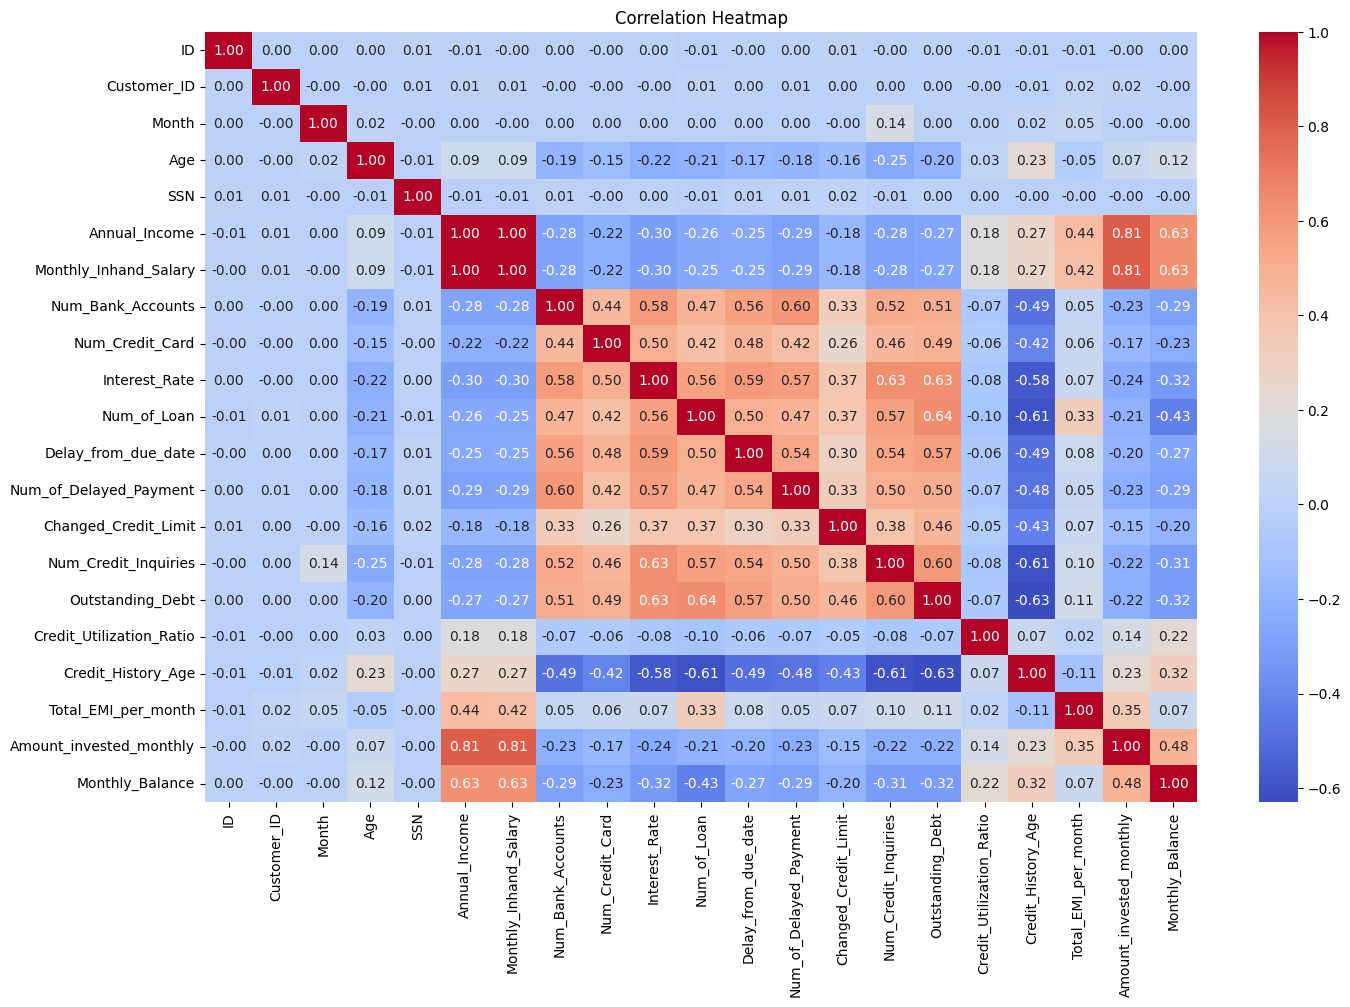

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

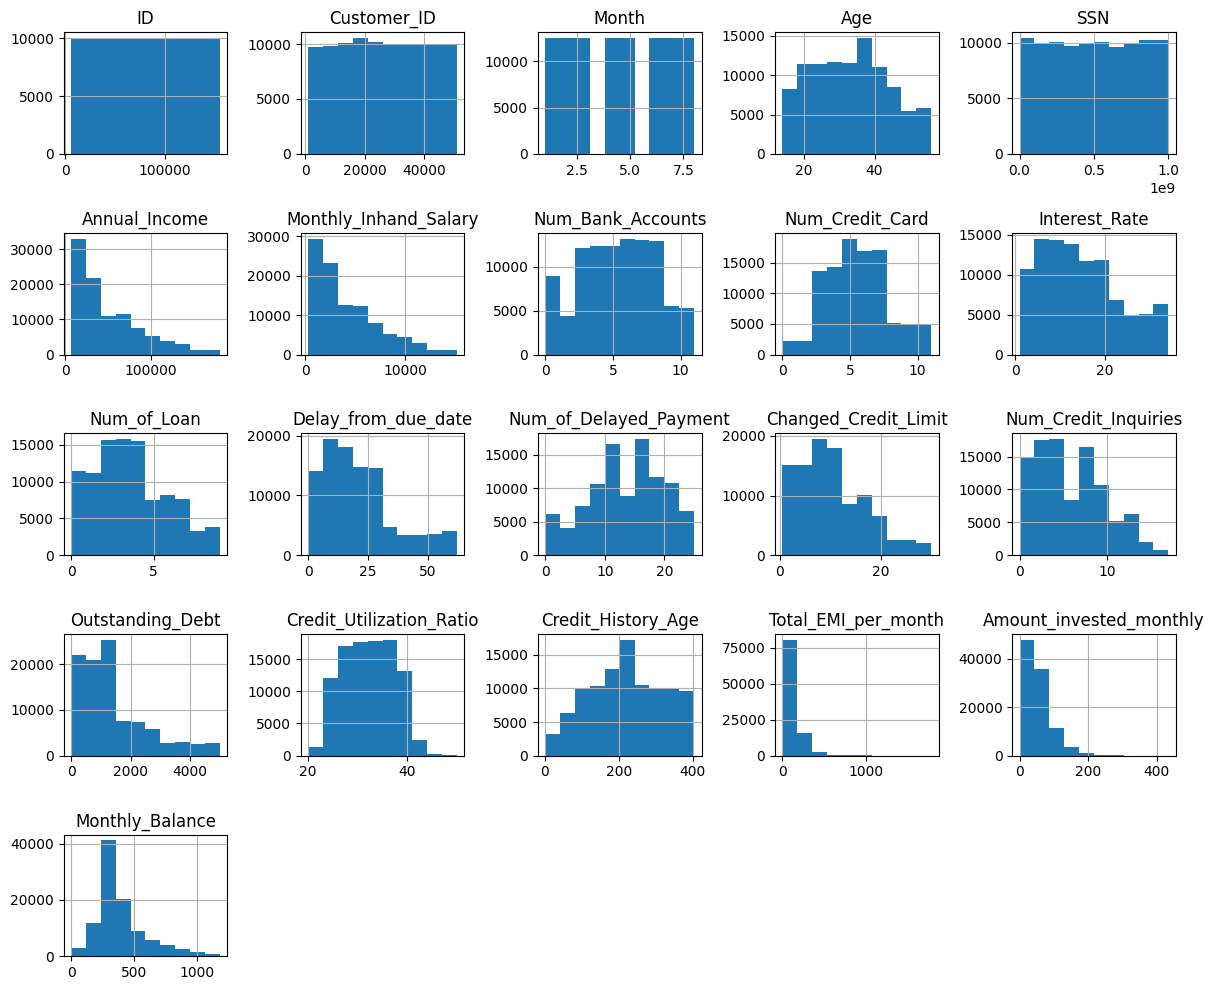

In [26]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


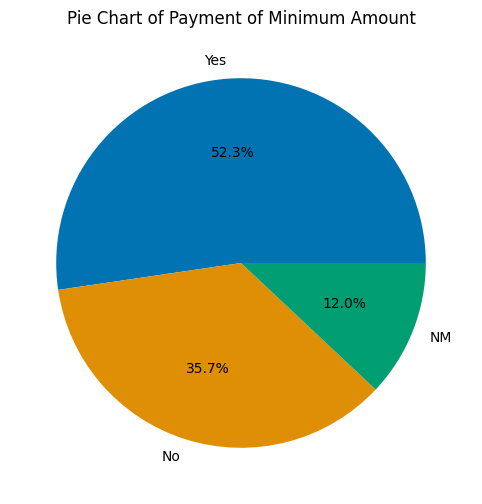

In [27]:
palette = 'colorblind'
plt.figure(figsize=(8, 6))
data['Payment_of_Min_Amount'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(palette))
plt.title('Pie Chart of Payment of Minimum Amount')
plt.ylabel('')
plt.show()

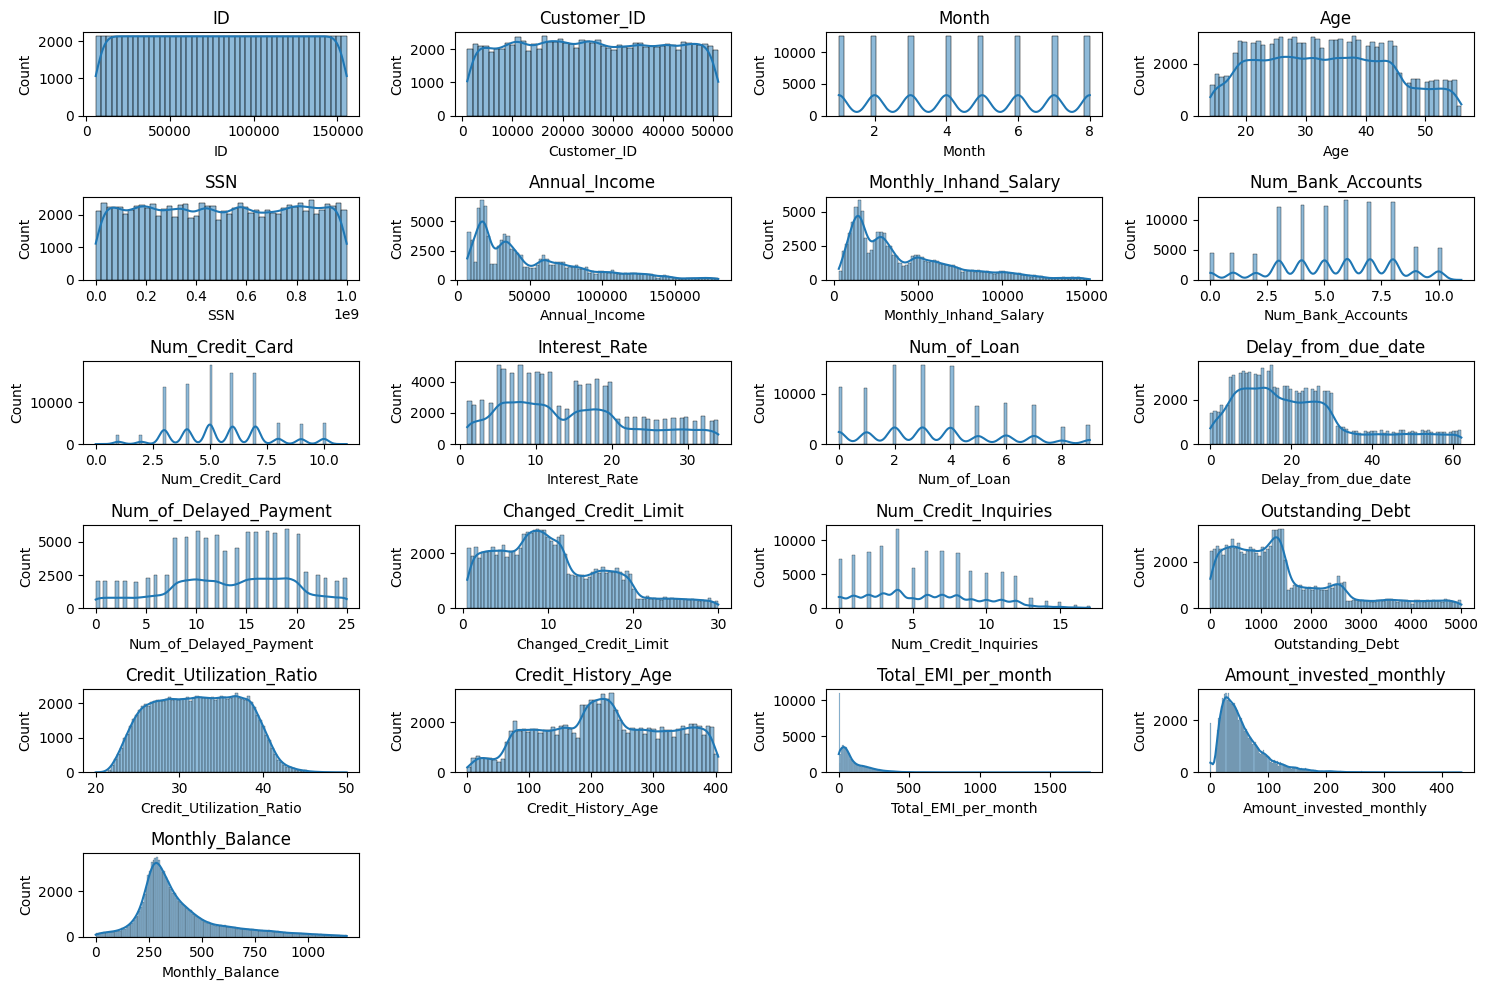

In [34]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6,4, i)  # Change the number of rows to 4
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

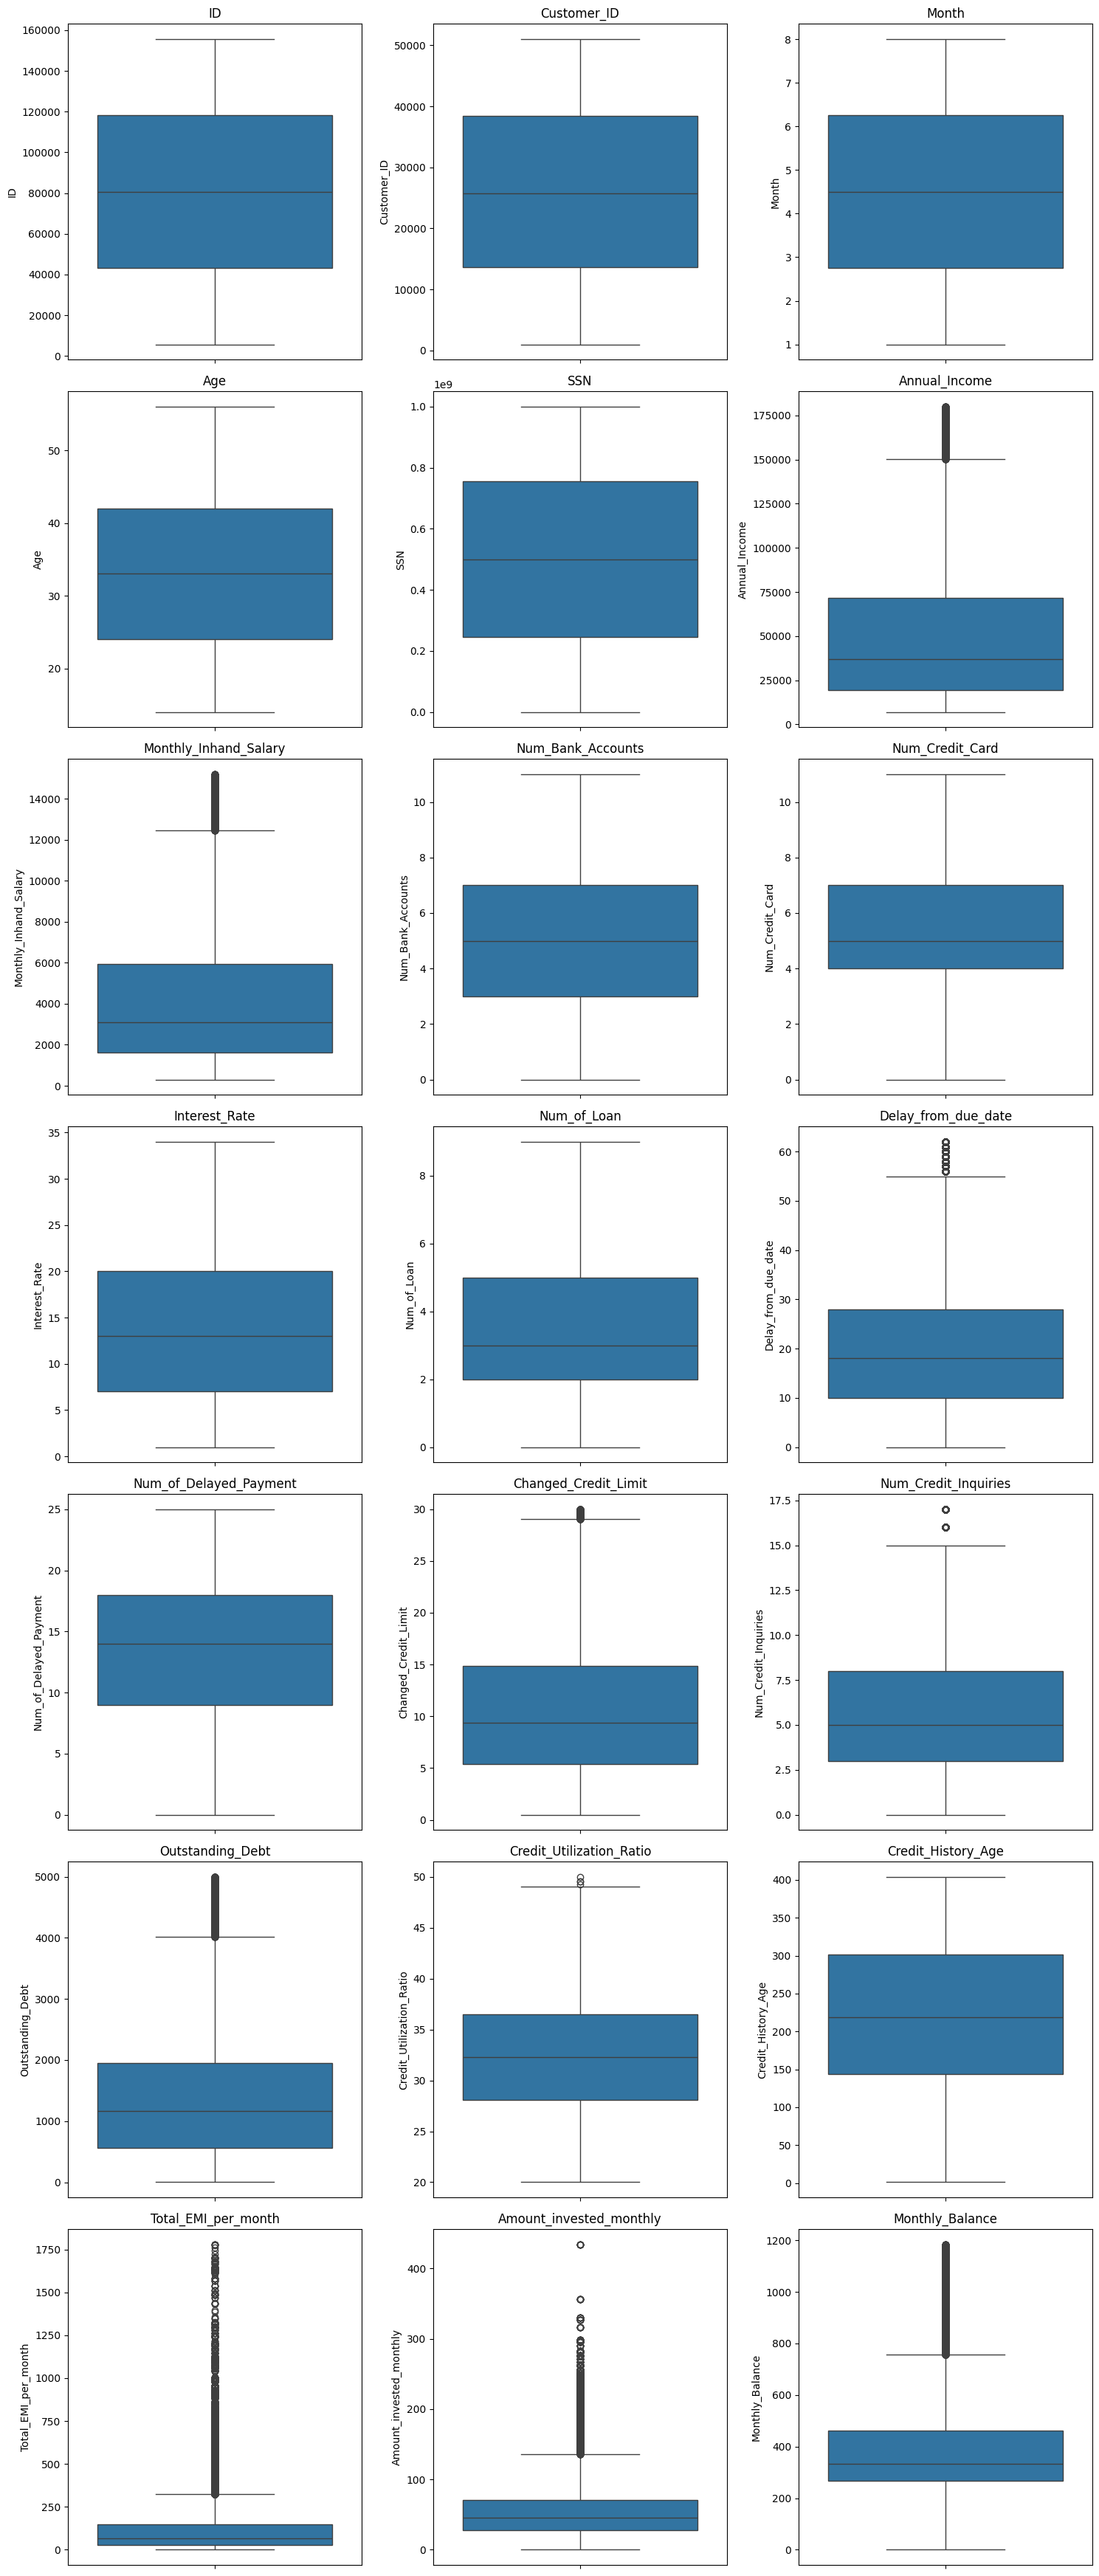

In [29]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical variable
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate number of rows needed
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns to 3
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [33]:


# Define a function to detect outliers using IQR method
def detect_outliers(data):
    outliers = []
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
            outliers.extend(outlier_indices)
    return list(set(outliers))

# Detect outliers
outliers_indices = detect_outliers(data)

# Remove outliers from the dataset
clean_data = data.drop(outliers_indices)

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outliers_indices)}")

# Use the clean_data for further analysis or modeling


Number of outliers removed: 23258


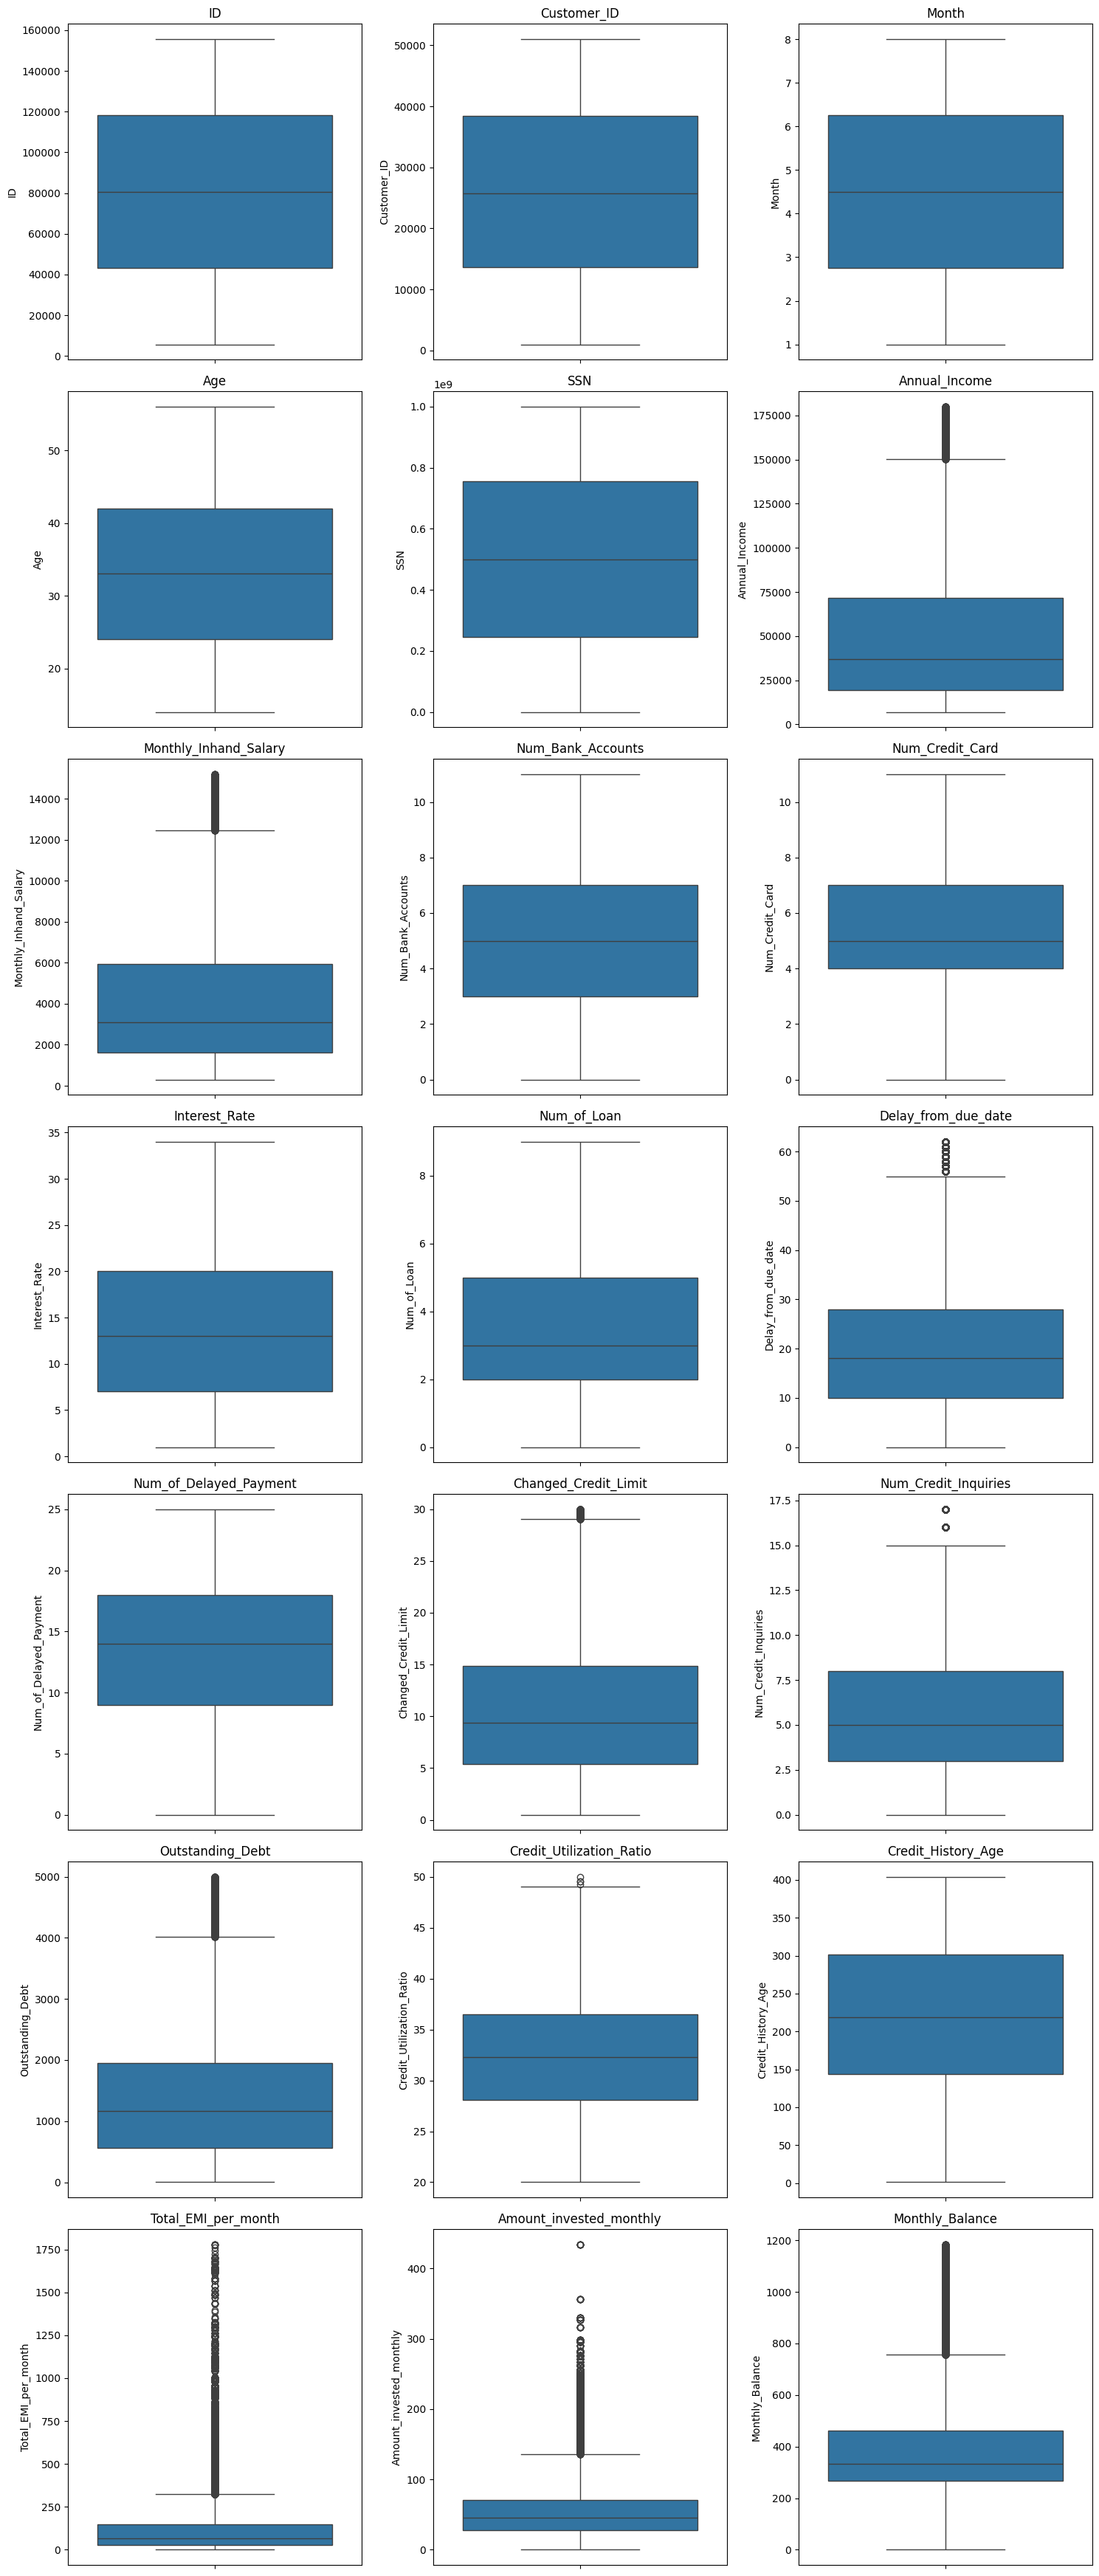

In [31]:
numerical_columns = clean_data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical variable
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate number of rows needed
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns to 3
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

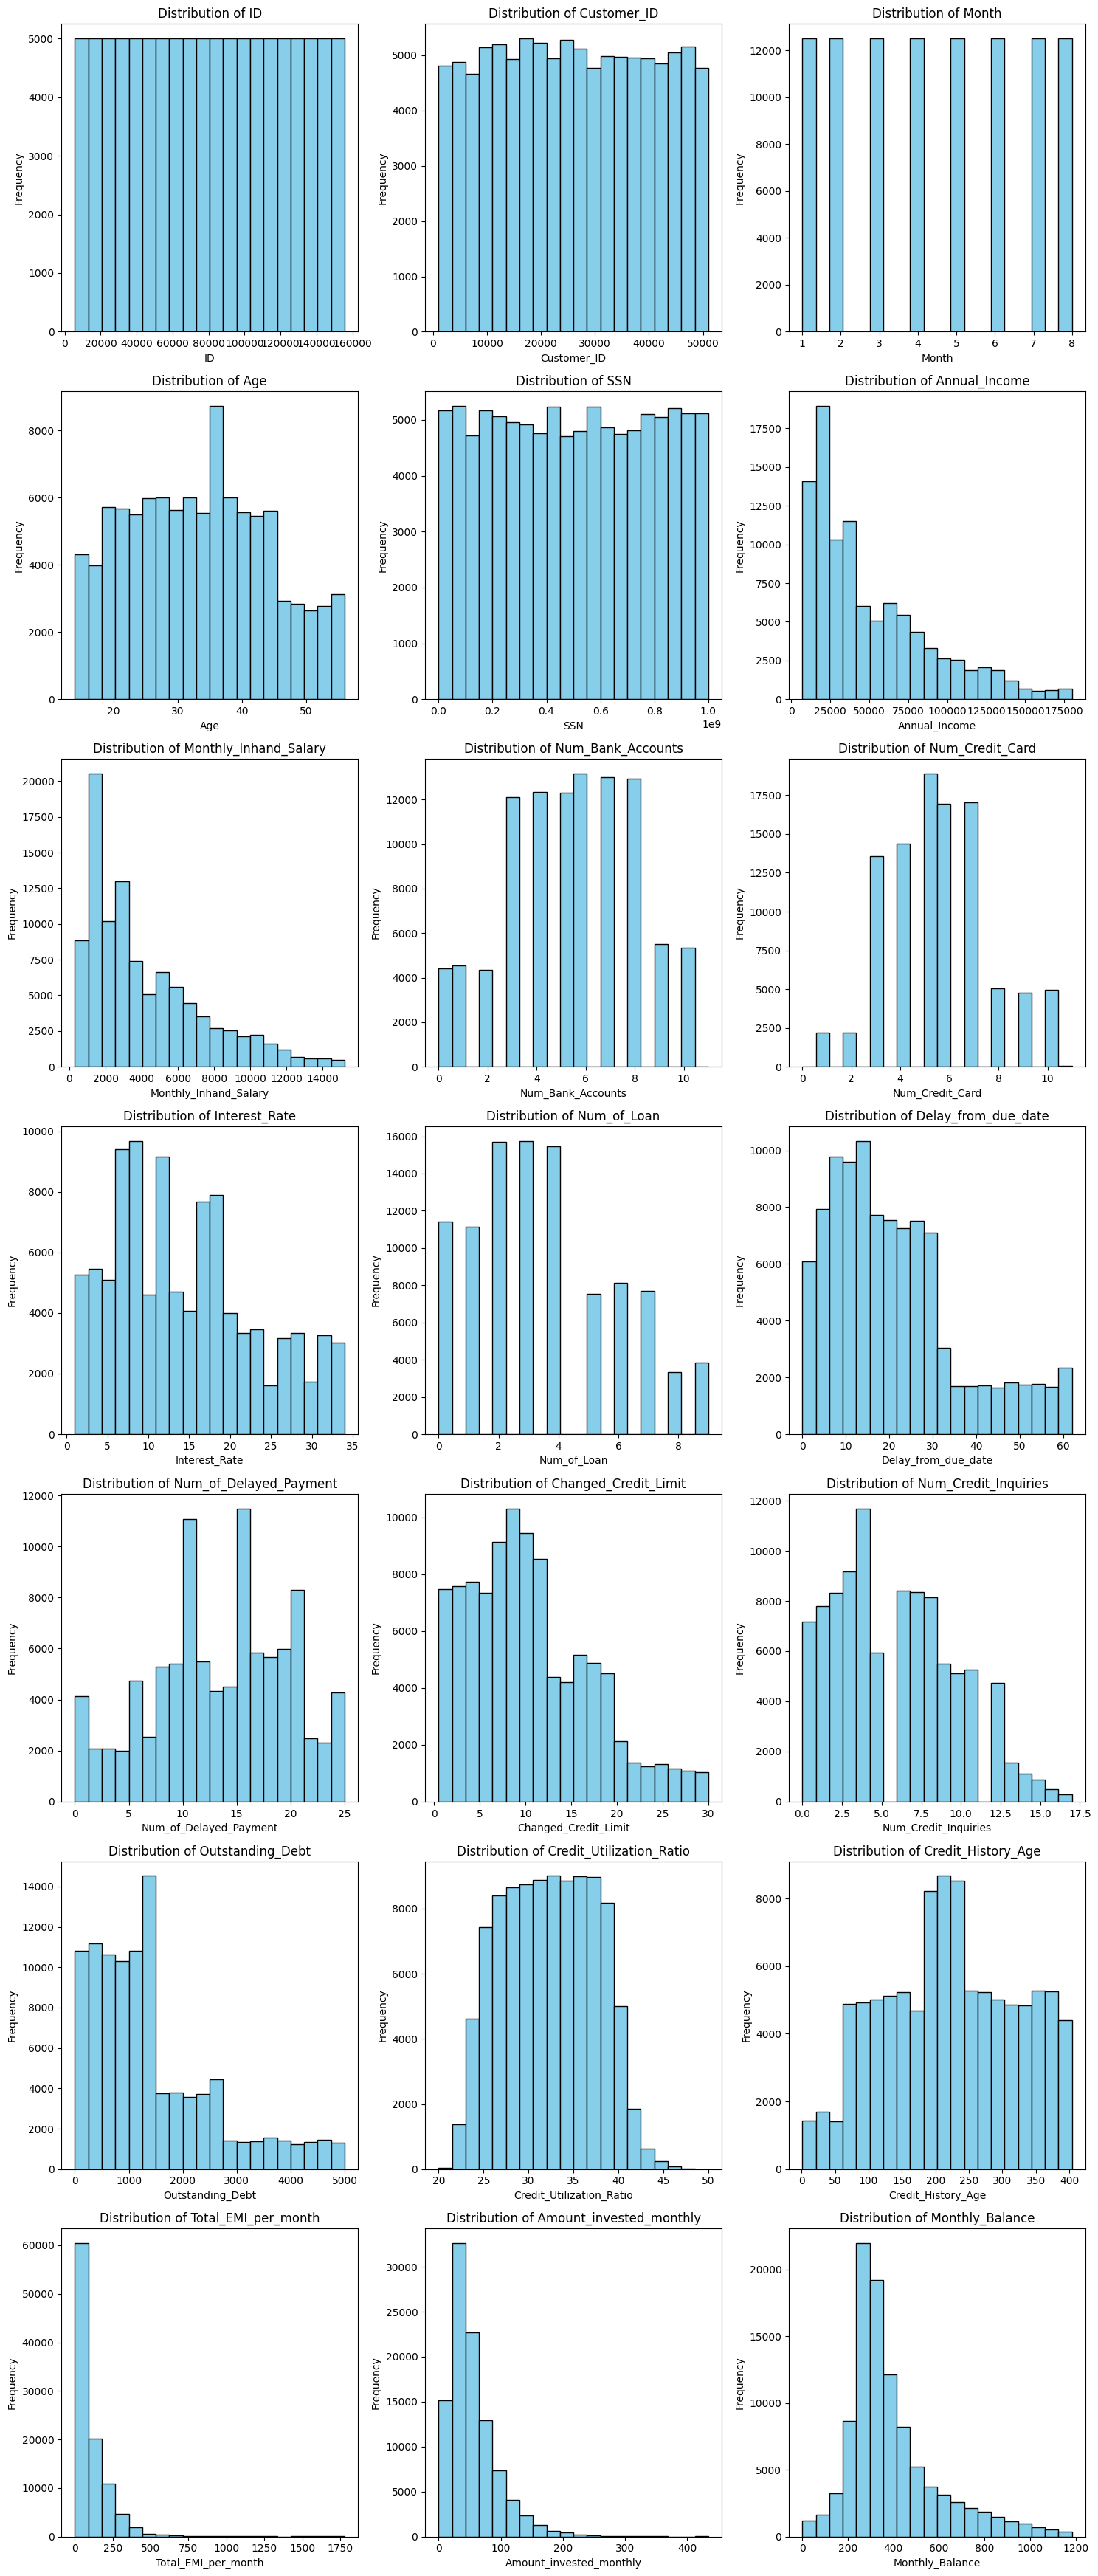

In [32]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = (len(numerical_columns) - 1) // num_cols + 1

# Plot histograms for each numerical variable
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

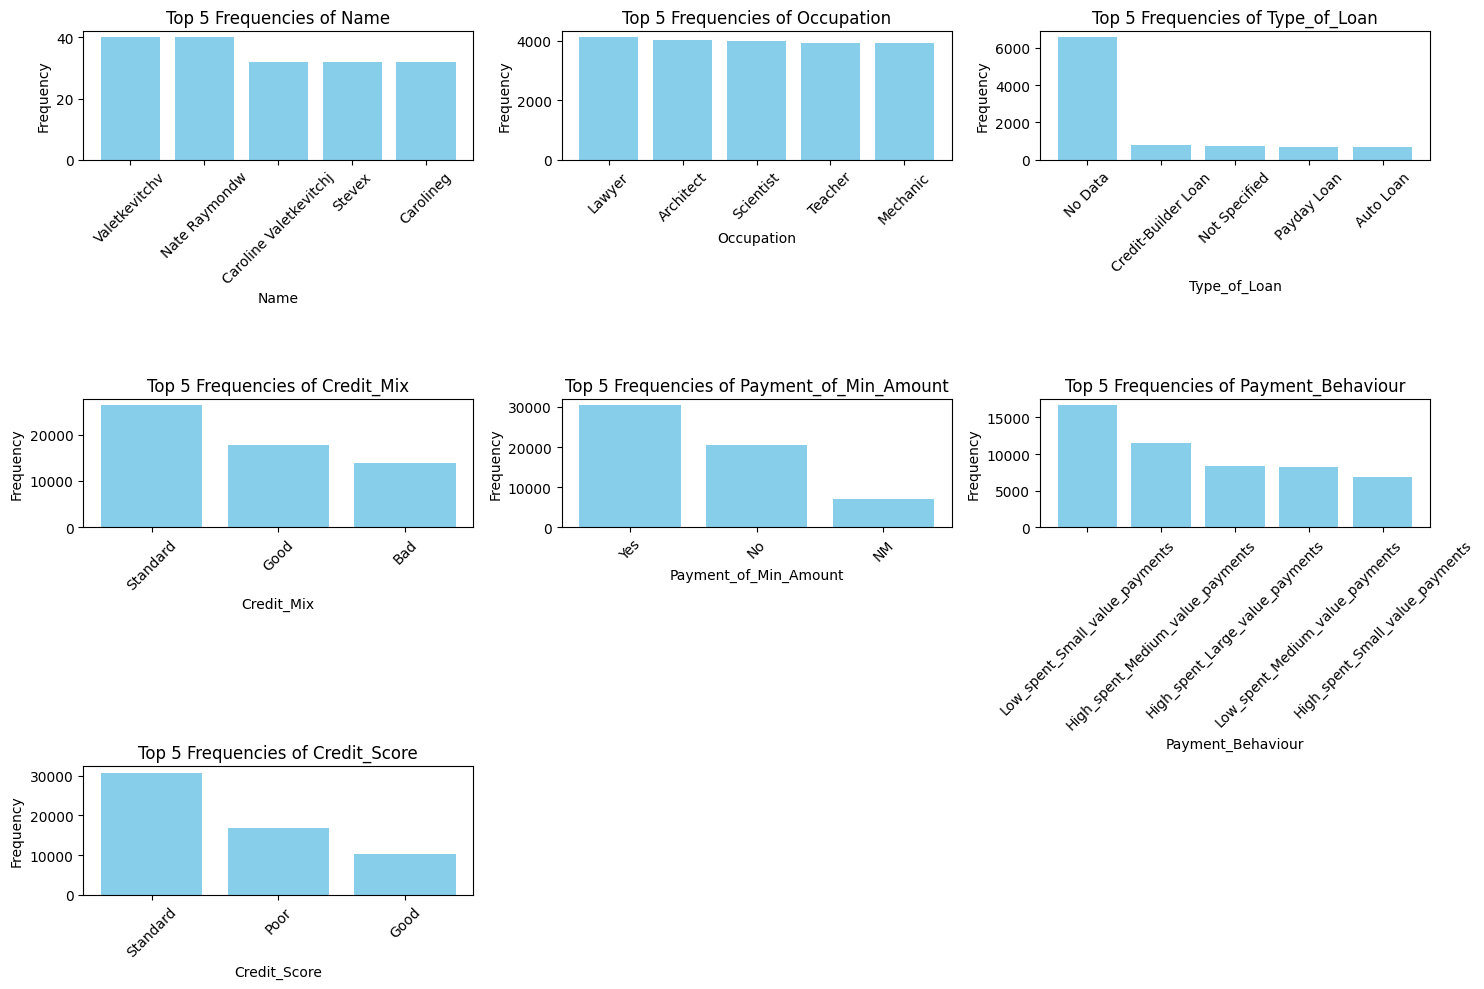

In [18]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Define the number of top values to plot for each categorical variable
top_n = 5

# Plot bar plots for the top N most frequent values of each categorical variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    value_counts = data[column].value_counts().head(top_n)
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Frequencies of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is in a pandas DataFrame called 'df'
label_encoder = LabelEncoder()
data['Credit_Score_Encoded'] = label_encoder.fit_transform(data['Credit_Score'])

# Display the encoded values
print(data[['Credit_Score', 'Credit_Score_Encoded']].head())

  Credit_Score  Credit_Score_Encoded
0         Good                     0
1         Good                     0
2         Good                     0
3         Good                     0
4         Good                     0


Splitting and Training the Data

In [50]:
selected_features = ['Age','Annual_Income', 'Num_of_Delayed_Payment', 'Num_Bank_Accounts','Outstanding_Debt',]
X = data[selected_features]
y = data['Credit_Score_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)